In [ ]:
# in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, sys
import pandas as pd
import numpy as np
import glob

In [ ]:
OCR = pd.DataFrame
OCR = [[[[252, 5], [286, 5], [286, 37], [252, 37]], 'text1'],
 [[[333, 50], [476, 50], [476, 82], [333, 82]], 'text2'],
 [[[573, 68], [717, 68], [717, 100], [573, 100]], 'text3'],
 [[[385, 135], [424, 135], [424, 159], [385, 159]], 'text4'],
 [[[674, 154], [712, 154], [712, 175], [674, 175]], 'text5'],
 [[[252, 182], [303, 182], [303, 239], [252, 239]], 'text6'],
 [[[541, 200], [581, 200], [581, 221], [541, 221]], 'text7'],
 [[[510, 269], [539, 269], [539, 296], [510, 296]], 'text8'],
 [[[577, 277], [615, 277], [615, 298], [577, 298]], 'text9'],
 [[[685, 273], [736, 273], [736, 303], [685, 303]], 'text10'],
 [[[371, 287], [435, 287], [435, 325], [371, 325]], 'text11'],
 [[[477, 394], [543, 394], [543, 431], [477, 431]], 'text12'],
 [[[565, 405], [616, 405], [616, 434], [565, 434]], 'text13'],
 [[[669, 408], [740, 408], [740, 437], [669, 437]], 'text14'],
 [[[506, 499], [557, 499], [557, 529], [506, 529]], 'text15'],
 [[[592, 503], [633, 503], [633, 529], [592, 529]], 'text16'],
 [[[670, 498], [743, 498], [743, 554], [670, 554]], 'text17'],
 [[[263, 683], [744, 683], [744, 768], [263, 768]],
  "text18"]]

new_OCR = []
for i in OCR:
  i = i[0][0][0], i[0][0][1], i[-1]
  new_OCR.append(i)

print(new_OCR)

[(252, 5, 'text1'), (333, 50, 'text2'), (573, 68, 'text3'), (385, 135, 'text4'), (674, 154, 'text5'), (252, 182, 'text6'), (541, 200, 'text7'), (510, 269, 'text8'), (577, 277, 'text9'), (685, 273, 'text10'), (371, 287, 'text11'), (477, 394, 'text12'), (565, 405, 'text13'), (669, 408, 'text14'), (506, 499, 'text15'), (592, 503, 'text16'), (670, 498, 'text17'), (263, 683, 'text18')]


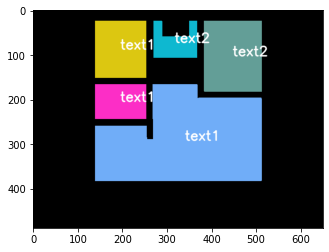

In [ ]:
import cv2
import matplotlib.pyplot as plt
# defines path to csv files
path = "/content/drive/MyDrive/ColabNotebooks"
os.chdir(path)

image= cv2.imread('coloblocks.png')
original_image= image

gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

edges= cv2.Canny(gray, 50,200)


contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


sorted_contours= sorted(contours, key=cv2.contourArea,)


for (i,c) in enumerate(sorted_contours):
    # print(c)
    rect = cv2.minAreaRect(c)
    # print(rect)
    box = cv2.boxPoints(rect)
    # box = np.int0(box)
    # print(box)

    M= cv2.moments(c)
    cx= int(M['m10']/M['m00'])
    cy= int(M['m01']/M['m00'])

    for (room_name_position_x, room_name_position_y, room_name) in new_OCR:
      if (box[0][0] < room_name_position_x < box[2][0] and box[1][1] < room_name_position_y < box[3][1]):
      # if (room_name_position_x, room_name_position_y) in c:
        cv2.putText(image, text= str(room_name), org=(cx,cy),
            fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255,255,255),
            thickness=2, lineType=cv2.LINE_AA)
        break
plt.imshow(image)
plt.show()

# http://www.learningaboutelectronics.com/Articles/How-to-label-objects-in-an-image-Python-OpenCV.php
# https://pythonmana.com/2021/10/20211022180215499A.html

# cv2.putText not surpport chinese